<a href="https://colab.research.google.com/github/tjtyler/MachLearn_HAC_Kmeans/blob/main/lab_5_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Clustering Lab





In [2]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.base import ClusterMixin
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
pip install ipdb

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# --------- DEBUG STUFF FOR PRINT FUNCTION ------------- #
k = 3
X = np.random.rand(20,5)
print('X:\n', X)
labels = np.array([0,0,1,2,1])
for i in range(k):
  clus_i_indcs = np.where(labels==i)
  print('clus_i_indcs:\n',clus_i_indcs[0])
  pnts_in_clus_i = X[clus_i_indcs[0],:]
  print('pnts_in_clus_i:\n', pnts_in_clus_i)
  centroid_i = np.mean(pnts_in_clus_i, axis=0)
  print('centroid_i:\n', centroid_i)


X:
 [[0.74389506 0.39781262 0.62140334 0.32370956 0.99582912]
 [0.04603188 0.27982287 0.67493464 0.12758654 0.4054233 ]
 [0.11511167 0.76791116 0.05476695 0.37000985 0.57475635]
 [0.59801852 0.10154986 0.55787861 0.97843329 0.06526696]
 [0.91698891 0.22733336 0.0849022  0.73462641 0.86500288]
 [0.44931144 0.90038936 0.86236681 0.30496572 0.36927534]
 [0.83961767 0.04713957 0.38546646 0.60410316 0.28267784]
 [0.92867755 0.80382585 0.01332921 0.95293683 0.4842041 ]
 [0.54230891 0.81296842 0.6935992  0.78552576 0.88800547]
 [0.41298718 0.26140336 0.50497715 0.72735802 0.7968192 ]
 [0.00677575 0.95545548 0.06715956 0.32147773 0.90979329]
 [0.58248316 0.04514829 0.45416915 0.07399186 0.47129385]
 [0.12210297 0.07249733 0.1919496  0.26502165 0.12573488]
 [0.23315383 0.5832999  0.83903984 0.27888548 0.80580601]
 [0.98363881 0.57817293 0.13310234 0.32333475 0.92533048]
 [0.56873907 0.07771607 0.44611488 0.07292141 0.03065834]
 [0.33517781 0.31944919 0.17992775 0.796524   0.24704854]
 [0.532301

## 1. (50%) Implement the k-means clustering algorithm and the HAC (Hierarchical Agglomerative Clustering) algorithm.

### 1.1.1 HAC

### Code requirements 
- HAC should support both single link and complete link options.
- HAC automatically generates all clusterings from n to 1.  To simplify the amount of output you may want to implement a mechanism to specify for which k values actual output will be generated.


---
The output should include the following:
- The number of clusters (k).
- The silhouette score of the full clustering. (You can either write and use your own silhouette_score function (extra credit) or use sklearn's)


For each cluster report include:


- The centroid id.
- The number of instances tied to that centroid. 
---

In [32]:
from scipy.spatial import distance
import math
# import ipdb; 
class HACClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,link_type='single',dist_type='manhattan'): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            link_type = single or complete. when combining two clusters use complete link or single link
        """
        self.link_type = link_type
        self.k = k
        self.dist_type = dist_type
        
    def fit(self, X, y=None):
      """ Fit the data; In this lab this will make the K clusters :D
      Args:
          X (array-like): A 2D numpy array with the training data
          y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
      Returns:
          self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
      """
      self.clus_labels = np.arange(X.shape[0])
      self.dist_mat = distance.cdist(X, X, metric='euclidean') 
      while len(np.unique(self.clus_labels)) > self.k:
        # ipdb.set_trace()
        min_A_label = None
        min_dist_bssf = math.inf
        min_B_ind = None

        temp_dist = None
        for i in range(len(np.unique(self.clus_labels)) -1):
          A_label = np.unique(self.clus_labels)[i]
          A_ind = np.where(self.clus_labels==A_label)

          for j in range(i+1,len(np.unique(self.clus_labels))):
            B_label = np.unique(self.clus_labels)[j]
            B_ind = np.where(self.clus_labels==B_label)

            AB_dist_mat = self.dist_mat[A_ind][:,B_ind]

            if self.link_type == 'single':
              temp_dist = np.min(AB_dist_mat)
            else:
              temp_dist = np.max(AB_dist_mat)
            if temp_dist < min_dist_bssf:
              min_dist_bssf = temp_dist
              min_A_label = A_label
              min_B_ind= B_ind

        self.clus_labels[min_B_ind] = min_A_label

      return self

    def init_clusters(self,X):
      clusters = []
      for i in range(X.shape[0]):
        clusters.append([i])
      return clusters
    
    def print_clusters(self,X):
        """
            Used for grading.
            print("Num clusters: {:d}\n".format(k))
            print("Silhouette score: {:.4f}\n\n".format(silhouette_score))
            for each cluster and centroid:
                print(np.array2string(centroid,precision=4,separator=","))
                print("{:d}\n".format(size of cluster))
        """
        print("Num clusters: {:d}\n".format(self.k))
        print("Silhouette score: {:.4f}\n\n".format(silhouette_score(X, self.clus_labels)))
        i = 0
        for unique_val in np.unique(self.clus_labels):
          clus_i_indices = np.where(self.clus_labels==unique_val)[0]
          pnts_in_clus_i = X[clus_i_indices,:]
          centroid_i = np.mean(pnts_in_clus_i,axis=0)
          print(f'centroid of cluster {i}:')
          print(np.array2string(centroid_i,precision=4,separator=","))
          print("size of cluster: {:d}\n".format(pnts_in_clus_i.shape[0]))

          i += 1

### 1.1.2 Debug 

Debug your model by running it on the [Debug Abalone Dataset](https://byu.instructure.com/courses/14142/files?preview=4735805)


---
The dataset was modified to be a lot smaller. The last datapoint should be on line 359 or the point 0.585,0.46,0.185,0.922,0.3635,0.213,0.285,10. The remaining points should be commented out.


- Make sure to include the output class (last column) as an additional input feature
- Normalize Data
- K = 5
- Use 4 decimal places and DO NOT ROUND when reporting silhouette score and centroid values.


---
Solutions in files:

[Debug HAC Single (Silhouette).txt](https://byu.instructure.com/courses/14142/files?preview=4735819)

[Debug HAC Complete (Silhouette).txt](https://byu.instructure.com/courses/14142/files?preview=4735820)

In [33]:
# Debug Here
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# Load data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab5_clustering/data/abalone.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()

X = np_arr[:,:].astype(float)
X = MinMaxScaler().fit_transform(X)

hac = HACClustering(k=5,link_type='single',dist_type='euclidean')
hac.fit(X)

hac.print_clusters(X)


Num clusters: 5

Silhouette score: 0.3453


centroid of cluster 0:
[0.599 ,0.5923,0.4915,0.2826,0.2682,0.2921,0.2316,0.3849]
size of cluster: 195

centroid of cluster 1:
[0.9189,0.9438,0.7105,0.7016,0.759 ,0.7222,0.4472,0.8824]
size of cluster: 1

centroid of cluster 2:
[1.    ,0.9831,0.8026,0.8343,0.6575,0.7825,0.9221,0.8824]
size of cluster: 2

centroid of cluster 3:
[1.    ,0.9888,0.7895,1.    ,1.    ,0.8915,0.7186,0.5882]
size of cluster: 1

centroid of cluster 4:
[0.9189,0.9888,0.8684,0.719 ,0.5797,0.7512,0.6432,0.9412]
size of cluster: 1



#Single Link Debug Solution
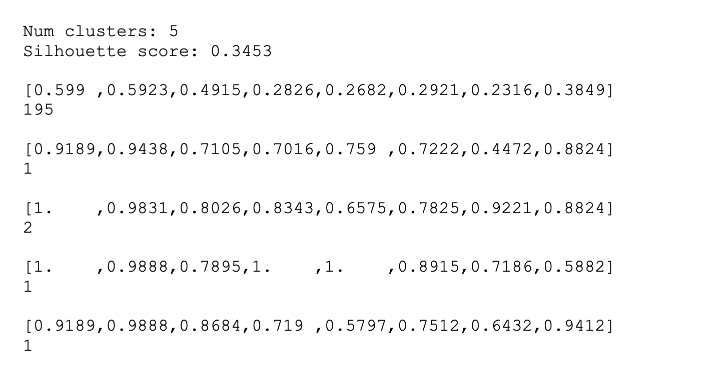

In [34]:
# Debug Here
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# Load data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab5_clustering/data/abalone.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()

X = np_arr[:,:].astype(float)
X = MinMaxScaler().fit_transform(X)

hac = HACClustering(k=5,link_type='complete',dist_type='euclidean')
hac.fit(X)

hac.print_clusters(X)

Num clusters: 5

Silhouette score: 0.3095


centroid of cluster 0:
[0.6544,0.649 ,0.5256,0.2879,0.2815,0.3057,0.2288,0.3911]
size of cluster: 71

centroid of cluster 1:
[0.3661,0.3505,0.271 ,0.1008,0.1024,0.1058,0.0836,0.2116]
size of cluster: 67

centroid of cluster 2:
[0.7622,0.7658,0.6759,0.4265,0.4016,0.4536,0.3376,0.5217]
size of cluster: 38

centroid of cluster 3:
[0.8818,0.8904,0.7582,0.614 ,0.5433,0.5317,0.561 ,0.7794]
size of cluster: 16

centroid of cluster 4:
[0.9471,0.934 ,0.8158,0.7457,0.6434,0.7944,0.6457,0.625 ]
size of cluster: 8



#Complete Link Debug Solution
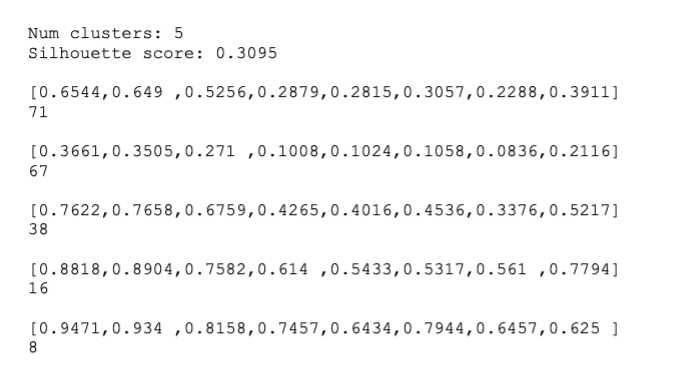

### 1.1.3 Evaluation

We will evaluate your model based on its print_clusters() output using [Evaluation Seismic-bumps_train Dataset](https://byu.instructure.com/courses/14142/files?preview=4735829)

- Make sure to include the output class (last column) as an additional input feature
- Normalize Data
- K = 5
- Use 4 decimal places and DO NOT ROUND when reporting silhouette score and centroid values.

#### 1.1.3.1 Complete Link

In [35]:
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Load evaluation data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab5_clustering/data/seismic-bumps_train.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()

X = np_arr[:,:].astype(float)
X = MinMaxScaler().fit_transform(X)

hac = HACClustering(k=5,link_type='complete',dist_type='euclidean')
# Train on evaluation data using complete link
hac.fit(X)
# Print clusters
hac.print_clusters(X)

Num clusters: 5

Silhouette score: 0.2930


centroid of cluster 0:
[0.3636,0.4107,0.5609,0.3857,0.3937,0.2808,0.3155,0.    ]
size of cluster: 49

centroid of cluster 1:
[0.3471,0.3622,0.7897,0.279 ,0.441 ,0.8568,0.2234,0.    ]
size of cluster: 3

centroid of cluster 2:
[0.1656,0.2226,0.3509,0.2328,0.152 ,0.3424,0.1918,0.    ]
size of cluster: 18

centroid of cluster 3:
[0.7918,0.8268,0.606 ,0.7669,0.7787,0.4634,0.7877,1.    ]
size of cluster: 49

centroid of cluster 4:
[0.5326,0.6002,0.4536,0.5531,0.5144,0.5401,0.6266,1.    ]
size of cluster: 21



#### 1.1.3.1 Single Link

In [36]:
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Load evaluation data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab5_clustering/data/seismic-bumps_train.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()

X = np_arr[:,:].astype(float)
X = MinMaxScaler().fit_transform(X)

hac = HACClustering(k=5,link_type='single',dist_type='euclidean')
# Train on evaluation data using single link
hac.fit(X)
# Print clusters
hac.print_clusters(X)

Num clusters: 5

Silhouette score: 0.3971


centroid of cluster 0:
[0.3159,0.3648,0.5145,0.349 ,0.3338,0.3077,0.2868,0.    ]
size of cluster: 67

centroid of cluster 1:
[0.2774,0.2597,1.    ,0.1224,0.4505,0.7549,0.129 ,0.    ]
size of cluster: 1

centroid of cluster 2:
[0.3065,0.3333,0.6979,0.2792,0.3787,1.    ,0.2373,0.    ]
size of cluster: 1

centroid of cluster 3:
[0.0884,0.1818,0.    ,0.145 ,0.1538,0.1245,0.    ,0.    ]
size of cluster: 1

centroid of cluster 4:
[0.714 ,0.7588,0.5603,0.7028,0.6994,0.4864,0.7393,1.    ]
size of cluster: 70



### 1.2.1 K-Means

### Code requirements 
- Ability to choose k and specify k initial centroids
- Use Euclidean Distance as metric
- Ability to handle distance ties
- Include output label as a cluster feature


---
The output should include the following:
- The number of clusters (k).
- The silhouette score of the full clustering. (You can either write and use your own silhouette_score function (extra credit) or use sklearn's)


For each cluster report include:


- The centroid id.
- The number of instances tied to that centroid. 
---
You only need to handle continuous features

In [121]:
import math
class KMEANSClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,debug=False): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            debug = if debug is true use the first k instances as the initial centroids otherwise choose random points as the initial centroids.
        """
        self.k = k
        self.debug = debug
        self.clus_labels = np.array([math.inf])
        self.epochs_to_converge = 0

    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        # NORMALIZE X BEFORE PASSINGIN IT IN  

        initial_centroids = None
        if self.debug:
          initial_centroids = X[:self.k,:] # initial_centroids are the first k instances of X
        else:
          initial_centroids = np.random.rand(self.k, X.shape[1])

        clus_labels = None
        centroids = initial_centroids
        converged = False
        epochs = 0
        prev_cent = initial_centroids
        while not converged:
    
          dist_mat = distance.cdist(X, centroids, metric='euclidean')
          dist_mat = dist_mat.T # transpose the matrix so that there are k rows and X.shape[0] columns

          clus_labels = [] # entry i in inst_labels is the cluster to which row i of X belongs of the k clusters
          for col in range(dist_mat.shape[1]):
            clus_labels.append(np.argmin(dist_mat[:,col]))
          clus_labels = np.array(clus_labels)
          
          centroids = []
          # compute new centroids
          for i in range(self.k):
            clus_i_indices = np.where(clus_labels==i)[0]
            pnts_in_clus_i = X[clus_i_indices,:]
            centroid_i = np.mean(pnts_in_clus_i, axis=0)
            centroids.append(centroid_i)
          centroids = np.array(centroids)
          
          if np.array_equal(prev_cent, centroids):
            converged = True
            self.epochs_to_converge = epochs

          prev_cent = centroids
          self.clus_labels = clus_labels
          epochs += 1

        return self
    
    def print_clusters(self,X):
        """
            Used for grading.
            print("Num clusters: {:d}\n".format(k))
            print("Silhouette score: {:.4f}\n\n".format(silhouette_score))
            for each cluster and centroid:
                print(np.array2string(centroid,precision=4,separator=","))
                print("{:d}\n".format(size of cluster))
        """
        print("Num clusters: {:d}\n".format(self.k))
        print('number of epochs/iterations to converge: ', self.epochs_to_converge)
        print("Silhouette score: {:.4f}\n\n".format(silhouette_score(X, self.clus_labels)))
        
        i = 0
        for unique_val in np.unique(self.clus_labels):
          clus_i_indices = np.where(self.clus_labels==unique_val)[0]
          pnts_in_clus_i = X[clus_i_indices,:]
          centroid_i = np.mean(pnts_in_clus_i,axis=0)
          print(f'centroid of cluster {i}:')
          print(np.array2string(centroid_i,precision=4,separator=","))
          print("size of cluster: {:d}\n".format(pnts_in_clus_i.shape[0]))

          i += 1

### 1.2.2 Debug 

Debug your model by running it on the [Debug Abalone Dataset](https://byu.instructure.com/courses/14142/files?preview=4735805)


- Train until convergence
- Make sure to include the output class (last column) as an additional input feature
- Normalize Data
- K = 5
- Use the first k instances as the initial centroids
- Use 4 decimal places and DO NOT ROUND when reporting silhouette score and centroid values




---
Solutions in files:

[Debug K Means (Silhouette).txt](https://byu.instructure.com/courses/14142/files?preview=4735840)

In [122]:
from scipy.io.arff import loadarff 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# Load debug data
raw_data = loadarff('/content/drive/MyDrive/School/CS_472_MachLearning/labs/lab5_clustering/data/abalone.arff')
df_data = pd.DataFrame(raw_data[0])

np_arr = df_data.to_numpy()

X = np_arr[:,:].astype(float)
X = MinMaxScaler().fit_transform(X)
# Train on debug data
KMeans = KMEANSClustering(k=5,debug=True)
KMeans.fit(X)
# Print clusters
KMeans.print_clusters(X)

Num clusters: 5

number of epochs/iterations to converge:  10
Silhouette score: 0.3845


centroid of cluster 0:
[0.7325,0.7327,0.627 ,0.3817,0.3633,0.4045,0.3046,0.4839]
size of cluster: 75

centroid of cluster 1:
[0.3704,0.3519,0.2686,0.0926,0.0935,0.094 ,0.0792,0.218 ]
size of cluster: 34

centroid of cluster 2:
[0.9035,0.905 ,0.7774,0.6579,0.5767,0.6193,0.5893,0.7279]
size of cluster: 24

centroid of cluster 3:
[0.5692,0.5628,0.4376,0.211 ,0.2113,0.2248,0.1659,0.317 ]
size of cluster: 54

centroid of cluster 4:
[0.1296,0.1037,0.1053,0.0177,0.0211,0.0272,0.0135,0.0724]
size of cluster: 13



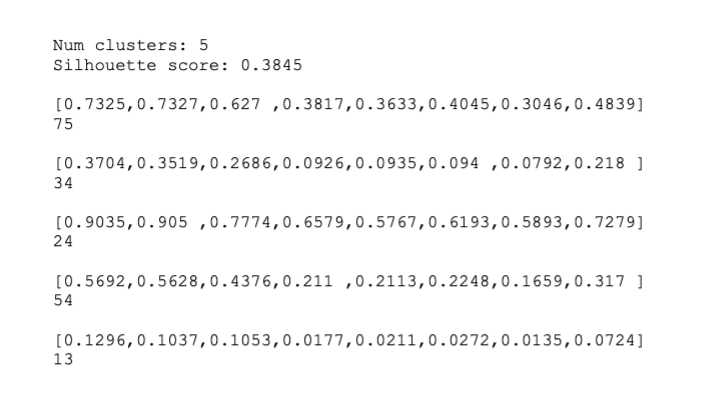

### 1.2.3 Evaluation

We will evaluate your model based on its print_clusters() output using [Evaluation Seismic-bumps_train Dataset](https://byu.instructure.com/courses/14142/files?preview=4735829)
- Train until convergence
- Make sure to include the output class (last column) as an additional input feature
- Normalize Data
- K = 5
- Use the first k instances as the initial centroids
- Use 4 decimal places and DO NOT ROUND when reporting silhouette score and centroid values

In [ ]:
# Load evaluation data

# Train on evaluation data

# Print clusters

## 2.1.1 (7.5%) Clustering the Iris Classification problem - HAC

Load the Iris Dataset [Iris Dataset](https://byu.instructure.com/courses/14142/files?preview=4421369)

- Use single-link and complete link clustering algorithms
- State whether you normalize your data or not (your choice).  
- Show your results for clusterings using k = 2-7.  
- Graph the silhouette score for each k and discuss your results (i.e. what kind of clusters are being made).
---

In [ ]:
# Iris Classification using single-link

In [ ]:
# Iris Classification using complete-link

Discuss differences between single-link and complete-link

## 2.1.2 (5%) Clustering the Iris Classification problem - HAC

Requirements:
- Repeat excercise 2.1.1 and include the output label as one of the input features.

In [ ]:
# Clustering Labels using single-link

In [ ]:
# Clustering Labels using complete-link

Discuss any differences between the results from 2.1.1 and 2.1.2.

## 2.2.1 (7.5%) Clustering the Iris Classification problem: K-Means

Load the Iris Dataset [Iris Dataset](https://byu.instructure.com/courses/14142/files?preview=4421369)

Run K-Means on the Iris dataset using the output label as a feature and without using the output label as a feature

Requirements:
- State whether you normalize your data or not (your choice).  
- Show your results for clusterings using k = 2-7.  
- Graph the silhouette score for each k and discuss your results (i.e. what kind of clusters are being made).
---

In [ ]:
# Iris Classification without output label

In [ ]:
# Iris Classification with output label

Compare results and differences between using the output label and excluding the output label

## 2.2.2 (5%) Clustering the Iris Classification problem: K-Means

Requirements:
- Use the output label as an input feature
- Run K-Means 5 times with k=4, each time with different initial random centroids and discuss any variations in the results. 

In [ ]:
#K-Means 5 times

Discuss any variations in the results

## 3.1 (12.5%) Run the SK versions of HAC (both single and complete link) on iris including the output label and compare your results with those above.
Use the silhouette score for this iris problem(k = 2-7).  You may write your own code to do silhouette (optional extra credit) or you can use sklearn.metrics.silhouette_score. Please state if you coded your own silhouette score function to receive the extra credit points (described below). Discuss how helpful Silhouette appeared to be for selecting which clustering is best. You do not need to supply full Silhouette graphs, but you could if you wanted to.

Requirements
- Use the Sillhouette score for this iris problem (k= 2-7) 
- Use at least one other scoring function from [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) and compare the results. State which metric was used. 
- Possible sklean metrics include (* metrics require ground truth labels):
    - adjusted_mutual_info_score*
    - adjusted_rand_score*
    - homogeneity_score*
    - completeness_score*
    - fowlkes_mallows_score*
    - calinski_harabasz_score
    - davies_bouldin_score
- Experiment using different hyper-parameters. Discuss Results

In [ ]:
# Load sklearn



*Record impressions*

## 3.2 (12.5%) Run the SK version of k-means on iris including the output label and compare your results with those above. 

Use the silhouette score for this iris problem(k = 2-7). You may write your own code to do silhouette (optional extra credit) or you can use sklearn.metrics.silhouette_score. Please state if you coded your own silhouette score function to receive the extra credit points (described below). Discuss how helpful Silhouette appeared to be for selecting which clustering is best. You do not need to supply full Silhouette graphs, but you could if you wanted to.

Requirements
- Use the Sillhouette score for this iris problem (k= 2-7) 
- Use at least one other scoring function form sklearn.metrics and compare the results. State which metric was used
- Experiment different hyper-parameters. Discuss Results

In [ ]:
# Load sklearn 



*Record impressions*

## 4. (Optional 5% extra credit) For your silhouette experiment above, write and use your own code to calculate the silhouette scores, rather than the SK or other version. 


*Show findings here*

In [ ]:
# Copy function Below